platform : darwin
compiling convolution.c


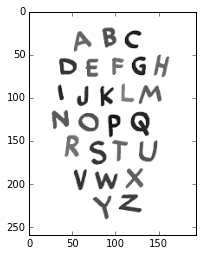

In [2]:
import matplotlib
from libconvolution import convolution
from image_handling import read_image,display_image
from gaussian import gaussian
from debug import time_this_function
%matplotlib inline
import math
import numpy
import setup
setup.compile()

image = read_image('sample_images/sample_image_1.png')
display_image(image)

# applying Gaussian smoothening

In [3]:
g = gaussian()
gaussian_kernel = g.generate_gaussian_smoothening_kernel(0.1)
# gaussian_kernel = [159,[[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]]]
gk = gaussian_kernel[1]
kn = gaussian_kernel[0]

255


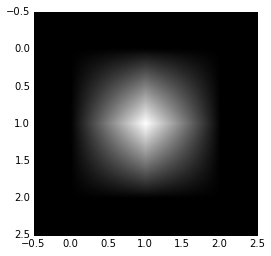

In [4]:
display_image(gk)

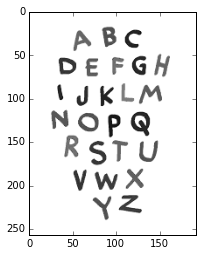

In [5]:
smoothened_image = convolution(image,gaussian_kernel)
# smoothened_image = image
display_image(smoothened_image)

# finding magnitude and direction vectors using Sobel operator

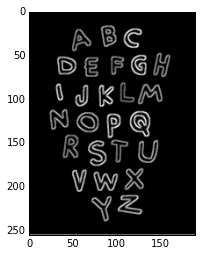

In [7]:
sobel_x = [1,[[-1,0,1],[-2,0,2],[-1,0,1]]]
sobel_y = [1,[[-1,-2,-1],[0,0,0],[1,2,1]]]

grad_x = convolution(smoothened_image,sobel_x,flag=False)
grad_y = convolution(smoothened_image,sobel_y,flag=False)

display_image(grad_x)

# for row in grad_x : 
#     print(row)s
magnitude = []
angle = []

def mod(value) : 
    if value < 0 : 
        return -value
    return value

for i in range(len(grad_x)) : 
    magnitude.append([])
    angle.append([])
    for j in range(len(grad_x[i])) :
        magnitude[-1].append(mod(grad_x[i][j]) + mod(grad_y[i][j]))
        sign = grad_x[i][j] * grad_y[i][j]
        if grad_x[i][j] != 0 :
            if sign >= 0 :
                angle[-1].append(int((math.atan(grad_y[i][j]/grad_x[i][j]))*180/math.pi))
            else :
                angle[-1].append(int(180 + math.atan(grad_y[i][j]/grad_x[i][j])*180/math.pi))
        else : 
            if grad_y[i][j] == 0 : 
                angle[-1].append(0)
            else : 
                angle[-1].append(90)
display_image(magnitude)
              

# quantization of the angle matrix

In [ ]:
  
def angle_quantization(angle) : 
    return_angle = []
    for row in angle :
        return_angle.append([])
        for pixel in row : 
            if pixel >= 22.5 and pixel < 67.5 :
                return_angle[-1].append(135)
            elif pixel >= 67.5 and pixel < 112.5 :
                return_angle[-1].append(90)
            elif pixel >= 112.5 and pixel < 157.5 : 
                return_angle[-1].append(45)
            else : 
                return_angle[-1].append(0)
    return return_angle

angle = angle_quantization(numpy.ascontiguousarray(angle,dtype=numpy.uint8))

display_image(angle)

In [ ]:
kernel1 = [1,[
        [ 0, 0,-1],
        [ 0, 1, 0],
        [ 0, 0, 0]
    ]]

kernel2 = [1,[
        [ 0, 0, 0],
        [ 0, 1, 0],
        [-1, 0, 0]
    ]]

In [ ]:
im1 = convolution(magnitude,kernel1)

In [ ]:
im2 = convolution(magnitude,kernel2)
display_image(im2)

In [ ]:
return_array = []
for row in 